# INTRODUCTION
- Introduce the data

# IMPORTS

In [20]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



In [21]:
# train_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
# val_gen = ImageDataGenerator(rescale=1./255)

In [22]:
from keras import layers, models

# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(128, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(1, activation='sigmoid')  # Use softmax and change units if multi-class
# ])


In [23]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# base_dir = "/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project"

# train_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True
# )

# validation_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation',
#     shuffle=True
# )


In [26]:
from tensorflow.keras import layers, models

# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
#     layers.MaxPooling2D(2,2),
    
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D(2,2),

#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(7, activation='softmax')  # 7 classes -> softmax
# ])

# model.compile(
#     loss='categorical_crossentropy',  # categorical loss
#     optimizer='adam',
#     metrics=['accuracy']
# )


In [27]:
# # Get the number of classes in your dataset
# num_classes = len(train_generator.class_indices)

# # Adjust the output layer of your model
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.models import Sequential

# model = Sequential()
# # ... other layers ...
# model.add(Dense(num_classes, activation='softmax'))


In [28]:
from keras.callbacks import EarlyStopping

# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# # Define early stopping
# early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# # Train the model
# model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=15,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // 32,
#     callbacks=[early_stop]
# )


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [30]:
layers.Dropout(0.5)


<Dropout name=dropout_1, built=True>

In [31]:
import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Val Accuracy')
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy / Loss')
# plt.title('Training Progress')
# plt.show()


In [32]:
import os
import shutil
import random

# Paths based on your earlier messages
source_dir = "/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project"
train_dir = os.path.join(source_dir, "train")
test_dir = os.path.join(source_dir, "test")

# Categories (subfolders)
categories = ["defect free", "hole", "horizontal", "lines", "stain", "Vertical"]

# Function to split data
def split_data(base_path, train_path, test_path, categories, split_ratio=0.8):
    for category in categories:
        category_path = os.path.join(base_path, category)
        train_category_path = os.path.join(train_path, category)
        test_category_path = os.path.join(test_path, category)
        
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)
        
        files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
        random.shuffle(files)
        
        split_index = int(len(files) * split_ratio)
        train_files = files[:split_index]
        test_files = files[split_index:]
        
        for file in train_files:
            shutil.copy2(os.path.join(category_path, file), os.path.join(train_category_path, file))
        for file in test_files:
            shutil.copy2(os.path.join(category_path, file), os.path.join(test_category_path, file))

# Execute the split
split_data(source_dir, train_dir, test_dir, categories)


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


# Training generator (from 'train' directory)
train_generator = datagen.flow_from_directory(
    '/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator (also from 'train', using validation_split)
validation_generator = datagen.flow_from_directory(
    '/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Testing generator (from 'test' directory, no validation split)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)


Found 2192 images belonging to 6 classes.
Found 546 images belonging to 6 classes.
Found 1635 images belonging to 6 classes.


In [34]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')  # 👈 MATCH THIS TO YOUR CLASS COUNT
])


/home/tclark/anaconda3/envs/CNN_Project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get the class labels from the train_generator
class_labels = np.unique(train_generator.classes)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',  # Automatically balance the weights
    classes=class_labels,  # List of all classes
    y=train_generator.classes  # Actual classes from your generator
)

# Convert it into a dictionary (required by model.fit())
class_weights_dict = dict(enumerate(class_weights))


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    class_weight=class_weights_dict  # Add class weights here
)




/home/tclark/anaconda3/envs/CNN_Project/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1745502315.957510    6648 service.cc:146] XLA service 0x7e9d58006520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745502315.957544    6648 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2025-04-24 09:45:16.033378: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-24 09:45:16.238079: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 1/69 ━━━━━━━━━━━━━━━━━━━━ 5:02 4s/step - accuracy: 0.0938 - loss: 1.8695

I0000 00:00:1745502318.793441    6648 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/69 ━━━━━━━━━━━━━━━━━━━━ 68s 938ms/step - accuracy: 0.4972 - loss: 1.3021 - val_accuracy: 0.4853 - val_loss: 1.4077
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 63s 913ms/step - accuracy: 0.7918 - loss: 0.7482 - val_accuracy: 0.5513 - val_loss: 1.2842
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 63s 914ms/step - accuracy: 0.8457 - loss: 0.6681 - val_accuracy: 0.6099 - val_loss: 1.3540
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 925ms/step - accuracy: 0.8437 - loss: 0.6496 - val_accuracy: 0.6429 - val_loss: 1.1642
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 925ms/step - accuracy: 0.8379 - loss: 0.6616 - val_accuracy: 0.5733 - val_loss: 1.5508
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 928ms/step - accuracy: 0.8637 - loss: 0.6005 - val_accuracy: 0.6447 - val_loss: 0.8906
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 927ms/step - accuracy: 0.8607 - loss: 0.6832 - val_accuracy: 0.5861 - val_loss: 1.2596
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 64s 923ms/step - accuracy: 0.8801 - loss: 0.5424 - val_accuracy: 0.591

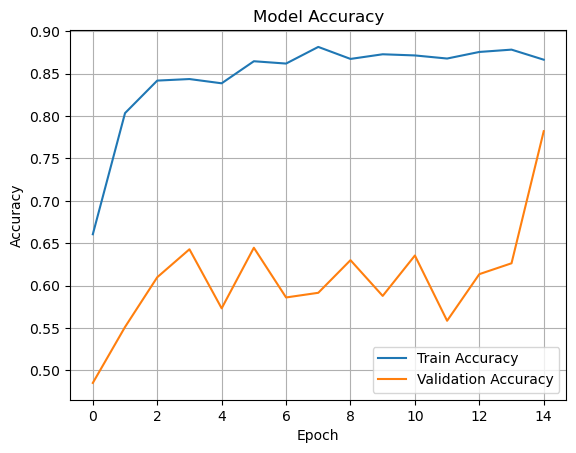

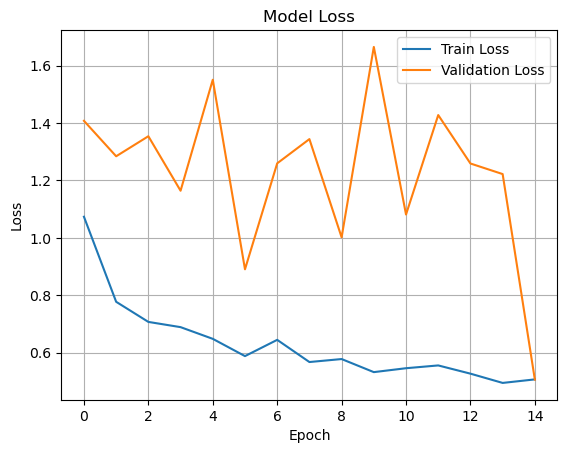

In [37]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')


52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 778ms/step - accuracy: 0.9007 - loss: 0.2526
Test Accuracy: 0.8703
Test Loss: 0.3084


In [39]:
import numpy as np
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 726ms/step


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

    Vertical       0.56      0.82      0.67        55
 defect free       0.95      0.96      0.95       994
        hole       0.78      0.53      0.63       177
  horizontal       0.84      0.70      0.77        81
       lines       0.67      0.89      0.77        99
       stain       0.81      0.82      0.82       229

    accuracy                           0.87      1635
   macro avg       0.77      0.79      0.77      1635
weighted avg       0.88      0.87      0.87      1635

Confusion Matrix:
[[ 45   0   7   2   1   0]
 [  0 951   0   0   1  42]
 [ 23  10  94   9  39   2]
 [ 12   0  10  57   2   0]
 [  0   1  10   0  88   0]
 [  0  41   0   0   0 188]]


In [41]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,877,780 (18.61 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,854 (12.40 MB)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import cv2

# 🔁 Step 1: Load and preprocess an image
img_path = '/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project/test/'  
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # same preprocessing as training

# 🔁 Step 2: Create a model to output conv layer + prediction
last_conv_layer_name = 'conv2d_8'
grad_model = Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output, model.output]
)

# 🔁 Step 3: Compute gradients
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    class_idx = tf.argmax(predictions[0])
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)

# 🔁 Step 4: Get importance of each channel
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# 🔁 Step 5: Normalize and overlay on image
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap)
heatmap = cv2.resize(heatmap.numpy(), (64, 64))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Original image
orig = cv2


IsADirectoryError: [Errno 21] Is a directory: '/home/tclark/Data Science/Data Mining/DataMiningGroupProject/Data_Mining_Final_Project/test/'